# Lena Image

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [2]:
image = 'Lenna_resize.png'

In [3]:
img = imread(image)

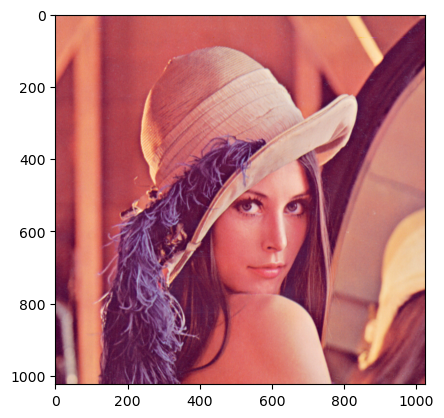

In [4]:
plt.imshow(img)

In [5]:
img.shape

(1024, 1024, 3)

In [7]:
kernel1 = np.array([
  [-1, 0, 1],
  [-2, 0, 2],
  [-1, 1, 1]
])

kernel2 = np.array([
  [0, 0.2, 0],
  [0.2, 0.4, 0.2],
  [0, 0.2, 0]
])

kernel3 = np.array([
  [0.1, 0.2, 0.1],
  [0, 0, 0],
  [0.1, 0.2, 0.1]
])

kernel4 = np.array([
  [0.1, 0.2, 0.1],
  [0.1, 0.2, 0.1],
  [0.1, 0.2, 0.1]
])

kernel5 = np.array([
  [1/9, 1/9, 1/9],
  [1/9, 1/9, 1/9],
  [1/9, 1/9, 1/9]
])

kernel6 = np.array([
  [0, -1, 0],
  [-1, 5, -1],
  [0, -1, 0]
])

kernel7 = np.array([
  [1, 0, -1],
  [1, 0, -1],
  [2, 0, -1]
])

kernel8 = np.array([
  [0.2, 0.3, 0.1],
  [0.1, 0, 0],
  [0.2, 0.3, 0.1]
])

In [8]:
filters = [kernel1, kernel2, kernel3, kernel4, kernel5, kernel6, kernel7, kernel8] 

In [9]:
import cv2

In [10]:
def filtering(arr):
    a = cv2.filter2D(img, -1, arr)
    return a

In [15]:
x_train = (list(map(filtering,filters)))

In [17]:
x_train.append(img)

In [19]:
x_train = np.array(x_train)

In [20]:
type(x_train)

numpy.ndarray

In [21]:
x_train.shape

(9, 1024, 1024, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


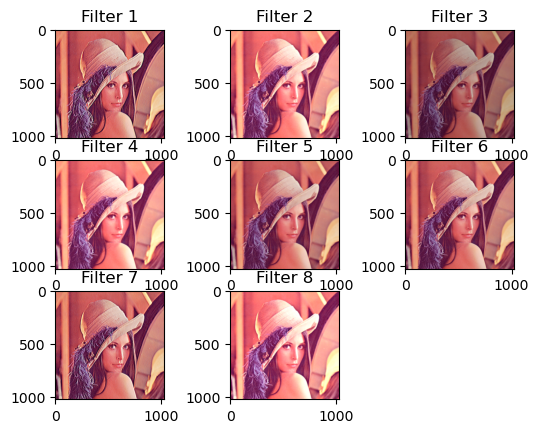

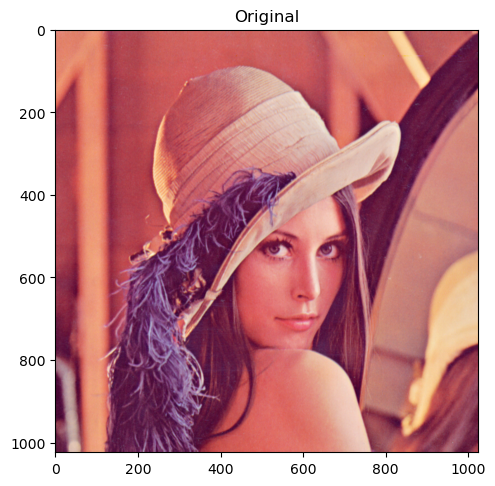

In [27]:
for image,i in zip(x_train[:8],range(1,10)):
    plt.subplot(3,3,i)
    plt.title('Filter {}'.format(i))
    plt.imshow(image)
    
plt.figure(figsize=(12,12))
plt.subplot(1,2,2)
plt.title("Original")
plt.imshow(x_train[-1])

plt.show()

In [29]:
np.sum(x_train[-1] == img)


3145728

In [30]:
x_test = x_train

In [31]:
import tensorflow as tf
from tensorflow.keras.models import save_model
#from tensorflow.python.framework import ops
import tensorflow.keras.layers as L

2023-03-23 19:20:20.325767: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 19:20:21.401985: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dell/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-03-23 19:20:21.402100: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dell/anaconda3/lib/python3.9/site-packages/cv2/../../lib64

In [32]:
def build_deep_autoencoder(img_shape, code_size):
    """PCA's deeper brother. See instructions above. Use `code_size` in layer definitions."""
    H,W,C = img_shape
    
    # encoder
    encoder = tf.keras.models.Sequential()
    encoder.add(L.InputLayer(img_shape))
    
    ### YOUR CODE HERE: define encoder as per instructions above ###
    encoder.add(L.Conv2D(filters=4, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=8, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=16, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=32, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=64, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=128, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=256, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=512, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Conv2D(filters=1024, kernel_size=(3, 3), activation='elu', padding='same'))
    encoder.add(L.MaxPooling2D(pool_size=(2, 2)))
    encoder.add(L.Flatten())
    encoder.add(L.Dense(code_size))

    # decoder
    decoder = tf.keras.models.Sequential()
    decoder.add(L.InputLayer((code_size,)))
    
    ### YOUR CODE HERE: define decoder as per instructions above ###
    decoder.add(L.Dense(2*2*1024))
    decoder.add(L.Reshape((2, 2, 1024)))
    decoder.add(L.Conv2DTranspose(filters=512, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=256, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=128, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=64, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=32, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=16, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=8, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=4, kernel_size=(3, 3), strides=2, activation='elu', padding='same'))
    decoder.add(L.Conv2DTranspose(filters=3, kernel_size=(3, 3), strides=2, activation=None, padding='same'))
    
    return encoder, decoder

In [33]:
IMG_SHAPE = (1024,1024,3)

In [34]:
tf.keras.backend.clear_session()
encoder, decoder = build_deep_autoencoder(IMG_SHAPE, code_size=2048)
encoder.summary()
decoder.summary()

2023-03-23 19:20:43.236272: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-23 19:20:43.275698: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/dell/anaconda3/lib/python3.9/site-packages/cv2/../../lib64:
2023-03-23 19:20:43.275736: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1934] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-03-23 19:20:43.276745: I tensorflow/core/platform

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1024, 1024, 4)     112       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 512, 512, 4)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 512, 512, 8)       296       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 256, 256, 8)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 16)      1168      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 128, 128, 16)     0

# Model Training

In [35]:
inp = L.Input(IMG_SHAPE)
code = encoder(inp)
reconstruction = decoder(code)

In [36]:
autoencoder = tf.keras.models.Model(inputs=inp, outputs=reconstruction)
autoencoder.compile(optimizer="adamax", loss='mse')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [39]:
history = autoencoder.fit(x=x_train, y=x_train, epochs=2600,
                validation_data=[x_test, x_test],
                           #keras_utils.TqdmProgressCallback()],
                verbose=1,callbacks=[early_stop])

Epoch 1/2600


2023-03-23 19:21:37.956789: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 113246208 exceeds 10% of free system memory.
2023-03-23 19:21:38.067811: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 113246208 exceeds 10% of free system memory.
2023-03-23 19:21:40.375620: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 113246208 exceeds 10% of free system memory.
2023-03-23 19:21:40.377369: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 113246208 exceeds 10% of free system memory.
2023-03-23 19:21:40.377552: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 113246208 exceeds 10% of free system memory.


1/1 [==============================] - 14s 14s/step - loss: 0.3526 - val_loss: 0.3513
Epoch 2/2600
1/1 [==============================] - 10s 10s/step - loss: 0.3513 - val_loss: 0.3499
Epoch 3/2600
1/1 [==============================] - 9s 9s/step - loss: 0.3499 - val_loss: 0.3486
Epoch 4/2600
1/1 [==============================] - 11s 11s/step - loss: 0.3486 - val_loss: 0.3472
Epoch 5/2600
1/1 [==============================] - 10s 10s/step - loss: 0.3472 - val_loss: 0.3456
Epoch 6/2600
1/1 [==============================] - 10s 10s/step - loss: 0.3456 - val_loss: 0.3435
Epoch 7/2600
1/1 [==============================] - 10s 10s/step - loss: 0.3435 - val_loss: 0.3413
Epoch 8/2600
1/1 [==============================] - 9s 9s/step - loss: 0.3413 - val_loss: 0.3397
Epoch 9/2600
1/1 [==============================] - 9s 9s/step - loss: 0.3397 - val_loss: 0.3372
Epoch 10/2600
1/1 [==============================] - 9s 9s/step - loss: 0.3372 - val_loss: 0.3352
Epoch 11/2600
1/1 [===========

1/1 [==============================] - 9s 9s/step - loss: 0.1435 - val_loss: 0.1425
Epoch 85/2600
1/1 [==============================] - 9s 9s/step - loss: 0.1425 - val_loss: 0.1403
Epoch 86/2600
1/1 [==============================] - 9s 9s/step - loss: 0.1403 - val_loss: 0.1389
Epoch 87/2600
1/1 [==============================] - 9s 9s/step - loss: 0.1389 - val_loss: 0.1373
Epoch 88/2600
1/1 [==============================] - 9s 9s/step - loss: 0.1373 - val_loss: 0.1355
Epoch 89/2600
1/1 [==============================] - 10s 10s/step - loss: 0.1355 - val_loss: 0.1343
Epoch 90/2600
1/1 [==============================] - 9s 9s/step - loss: 0.1343 - val_loss: 0.1324
Epoch 91/2600
1/1 [==============================] - 10s 10s/step - loss: 0.1324 - val_loss: 0.1312
Epoch 92/2600
1/1 [==============================] - 9s 9s/step - loss: 0.1312 - val_loss: 0.1297
Epoch 93/2600
1/1 [==============================] - 9s 9s/step - loss: 0.1297 - val_loss: 0.1279
Epoch 94/2600
1/1 [===========

Epoch 167/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0618 - val_loss: 0.0612
Epoch 168/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0612 - val_loss: 0.0607
Epoch 169/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0607 - val_loss: 0.0601
Epoch 170/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0601 - val_loss: 0.0596
Epoch 171/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0596 - val_loss: 0.0591
Epoch 172/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0591 - val_loss: 0.0586
Epoch 173/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0586 - val_loss: 0.0581
Epoch 174/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0581 - val_loss: 0.0576
Epoch 175/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0576 - val_loss: 0.0571
Epoch 176/2600
1/1 [==============================] - 8s 8s/step - loss: 0.0571 - val_loss: 0.0566
Epoch 17

1/1 [==============================] - 9s 9s/step - loss: 0.0326 - val_loss: 0.0324
Epoch 250/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0324 - val_loss: 0.0323
Epoch 251/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0323 - val_loss: 0.0321
Epoch 252/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0321 - val_loss: 0.0319
Epoch 253/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0319 - val_loss: 0.0318
Epoch 254/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0318 - val_loss: 0.0316
Epoch 255/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0316 - val_loss: 0.0314
Epoch 256/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0314 - val_loss: 0.0311
Epoch 257/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0311 - val_loss: 0.0309
Epoch 258/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0309 - val_loss: 0.0306
Epoch 259/2600
1/1 [===

1/1 [==============================] - 9s 9s/step - loss: 0.0205 - val_loss: 0.0204
Epoch 332/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0204 - val_loss: 0.0203
Epoch 333/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0203 - val_loss: 0.0202
Epoch 334/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0202 - val_loss: 0.0201
Epoch 335/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0201 - val_loss: 0.0200
Epoch 336/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0200 - val_loss: 0.0199
Epoch 337/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0199 - val_loss: 0.0198
Epoch 338/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0198 - val_loss: 0.0197
Epoch 339/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0197 - val_loss: 0.0196
Epoch 340/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0196 - val_loss: 0.0195
Epoch 341/2600
1/1 [=

1/1 [==============================] - 9s 9s/step - loss: 0.0149 - val_loss: 0.0149
Epoch 414/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0149 - val_loss: 0.0148
Epoch 415/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0148 - val_loss: 0.0148
Epoch 416/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0148 - val_loss: 0.0147
Epoch 417/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0147 - val_loss: 0.0147
Epoch 418/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0147 - val_loss: 0.0147
Epoch 419/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0147 - val_loss: 0.0146
Epoch 420/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0146 - val_loss: 0.0146
Epoch 421/2600
1/1 [==============================] - 8s 8s/step - loss: 0.0146 - val_loss: 0.0145
Epoch 422/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0145 - val_loss: 0.0145
Epoch 423/2600
1/1 [=

1/1 [==============================] - 8s 8s/step - loss: 0.0123 - val_loss: 0.0122
Epoch 496/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0122 - val_loss: 0.0122
Epoch 497/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0122 - val_loss: 0.0122
Epoch 498/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0122 - val_loss: 0.0121
Epoch 499/2600
1/1 [==============================] - 8s 8s/step - loss: 0.0121 - val_loss: 0.0121
Epoch 500/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0121 - val_loss: 0.0121
Epoch 501/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0121 - val_loss: 0.0121
Epoch 502/2600
1/1 [==============================] - 8s 8s/step - loss: 0.0121 - val_loss: 0.0120
Epoch 503/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0120 - val_loss: 0.0120
Epoch 504/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0120 - val_loss: 0.0120
Epoch 505/2600
1/1 [=

1/1 [==============================] - 10s 10s/step - loss: 0.0110 - val_loss: 0.0110
Epoch 578/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0110 - val_loss: 0.0112
Epoch 579/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0112 - val_loss: 0.0114
Epoch 580/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0114 - val_loss: 0.0116
Epoch 581/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0116 - val_loss: 0.0112
Epoch 582/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0112 - val_loss: 0.0108
Epoch 583/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0108 - val_loss: 0.0114
Epoch 584/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0114 - val_loss: 0.0116
Epoch 585/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0116 - val_loss: 0.0114
Epoch 586/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0114 - val_loss: 0.0114
Epoch 587/2600
1/1 [=

1/1 [==============================] - 9s 9s/step - loss: 0.0100 - val_loss: 0.0100
Epoch 660/2600
1/1 [==============================] - 8s 8s/step - loss: 0.0100 - val_loss: 0.0100
Epoch 661/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0100 - val_loss: 0.0099
Epoch 662/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0099 - val_loss: 0.0099
Epoch 663/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0099 - val_loss: 0.0100
Epoch 664/2600
1/1 [==============================] - 8s 8s/step - loss: 0.0100 - val_loss: 0.0099
Epoch 665/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0099 - val_loss: 0.0099
Epoch 666/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0099 - val_loss: 0.0099
Epoch 667/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0099 - val_loss: 0.0099
Epoch 668/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0099 - val_loss: 0.0099
Epoch 669/2600
1/1 [===

1/1 [==============================] - 9s 9s/step - loss: 0.0094 - val_loss: 0.0093
Epoch 742/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0093 - val_loss: 0.0093
Epoch 743/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0093 - val_loss: 0.0093
Epoch 744/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0093 - val_loss: 0.0093
Epoch 745/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0093 - val_loss: 0.0093
Epoch 746/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0093 - val_loss: 0.0093
Epoch 747/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0093 - val_loss: 0.0093
Epoch 748/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0093 - val_loss: 0.0093
Epoch 749/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0093 - val_loss: 0.0093
Epoch 750/2600
1/1 [==============================] - 8s 8s/step - loss: 0.0093 - val_loss: 0.0093
Epoch 751/2600
1/1 [===

Epoch 824/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0089 - val_loss: 0.0089
Epoch 825/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0089 - val_loss: 0.0089
Epoch 826/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0089 - val_loss: 0.0089
Epoch 827/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0089 - val_loss: 0.0089
Epoch 828/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0089 - val_loss: 0.0089
Epoch 829/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0089 - val_loss: 0.0089
Epoch 830/2600
1/1 [==============================] - 8s 8s/step - loss: 0.0089 - val_loss: 0.0090
Epoch 831/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0090 - val_loss: 0.0091
Epoch 832/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0091 - val_loss: 0.0093
Epoch 833/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0093 - val_loss: 0.0096
Epoc

1/1 [==============================] - 9s 9s/step - loss: 0.0085 - val_loss: 0.0085
Epoch 907/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0085 - val_loss: 0.0084
Epoch 908/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0084 - val_loss: 0.0084
Epoch 909/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0084 - val_loss: 0.0084
Epoch 910/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0084 - val_loss: 0.0084
Epoch 911/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0084 - val_loss: 0.0084
Epoch 912/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0084 - val_loss: 0.0084
Epoch 913/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0084 - val_loss: 0.0084
Epoch 914/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0084 - val_loss: 0.0084
Epoch 915/2600
1/1 [==============================] - 10s 10s/step - loss: 0.0084 - val_loss: 0.0084
Epoch 916/2600
1/1 [=

1/1 [==============================] - 9s 9s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 989/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 990/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 991/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 992/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 993/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 994/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 995/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 996/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 997/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0080 - val_loss: 0.0080
Epoch 998/2600
1/1 [=====

1/1 [==============================] - 9s 9s/step - loss: 0.0075 - val_loss: 0.0075
Epoch 1071/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0075 - val_loss: 0.0075
Epoch 1072/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0075 - val_loss: 0.0075
Epoch 1073/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0075 - val_loss: 0.0075
Epoch 1074/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0075 - val_loss: 0.0075
Epoch 1075/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0075 - val_loss: 0.0075
Epoch 1076/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0075 - val_loss: 0.0075
Epoch 1077/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0075 - val_loss: 0.0075
Epoch 1078/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0075 - val_loss: 0.0074
Epoch 1079/2600
1/1 [==============================] - 9s 9s/step - loss: 0.0074 - val_loss: 0.0074
Epoch 1080/2600


# Encoder output Visualization

In [40]:
def visualize(img,encoder,decoder):
    """Draws original, encoded and decoded images"""
    code = encoder.predict(img[None])[0]  # img[None] is the same as img[np.newaxis, :]
    reco = decoder.predict(code[None])[0]

    plt.subplot(1,3,1)
    plt.title("Original")
    plt.imshow(img)

    plt.subplot(1,3,2)
    plt.title("Code")
    plt.imshow(code.reshape([code.shape[-1]//2,-1]))

    plt.subplot(1,3,3)
    plt.title("Reconstructed")
    plt.imshow(reco)
    plt.show()

Convolutional autoencoder MSE: 0.007966628298163414
1/1 [==============================] - 0s 85ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


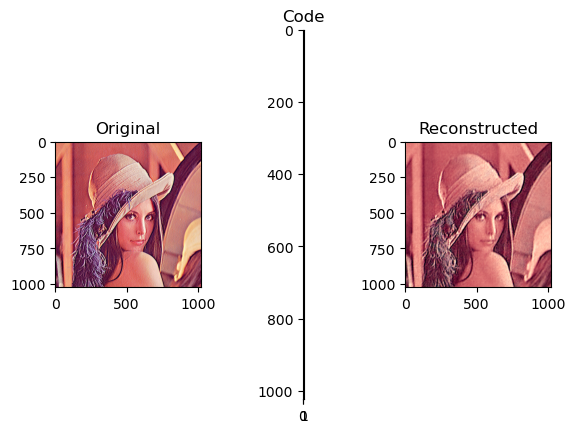

1/1 [==============================] - 0s 96ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


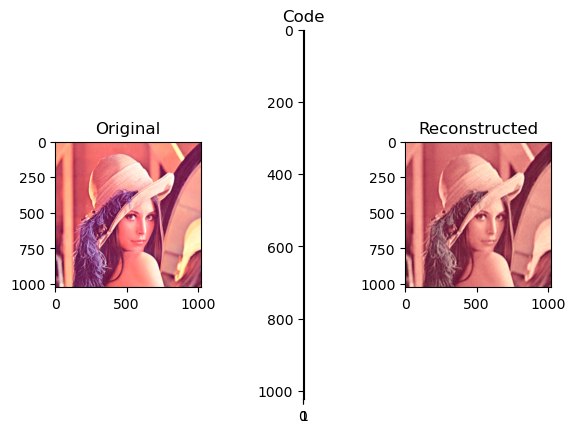

1/1 [==============================] - 0s 92ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


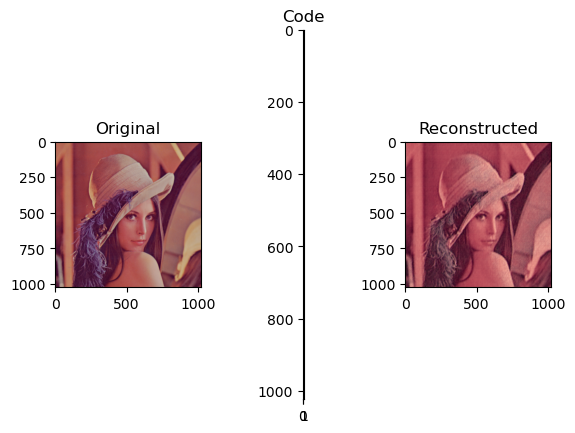

1/1 [==============================] - 0s 87ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


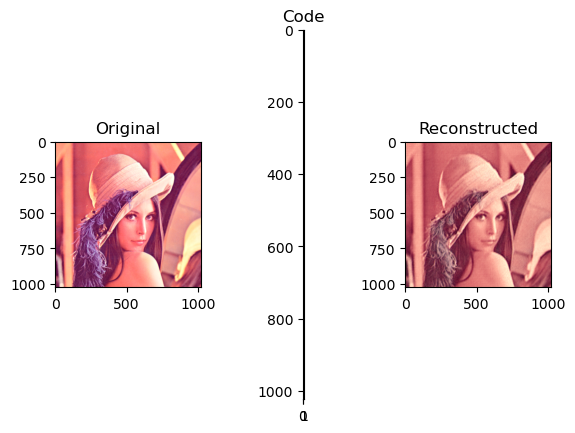

1/1 [==============================] - 0s 90ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


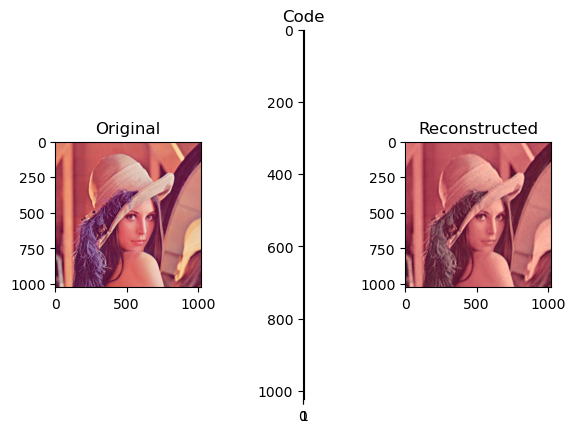

1/1 [==============================] - 0s 88ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


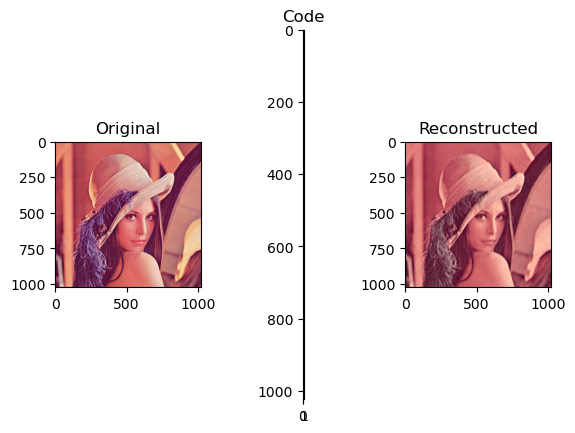

1/1 [==============================] - 0s 95ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


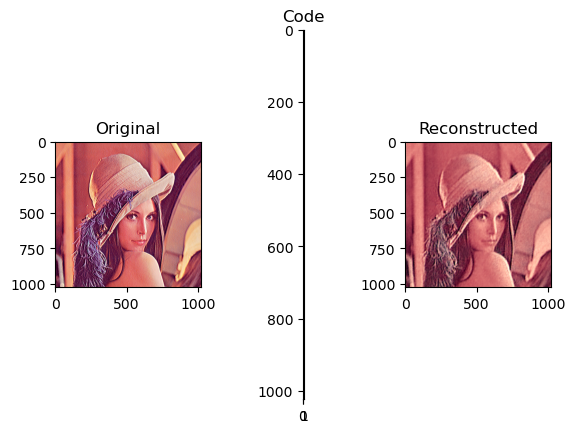

1/1 [==============================] - 0s 214ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


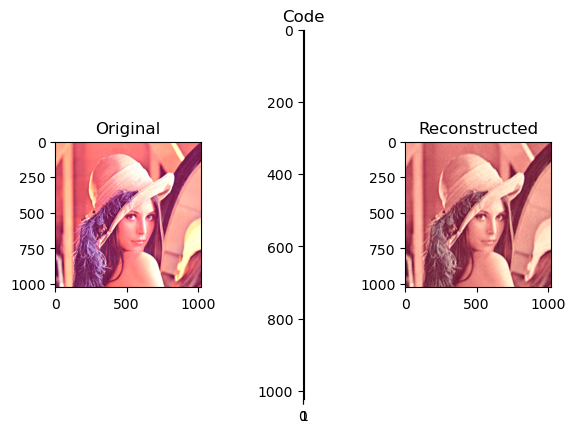

1/1 [==============================] - 0s 177ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


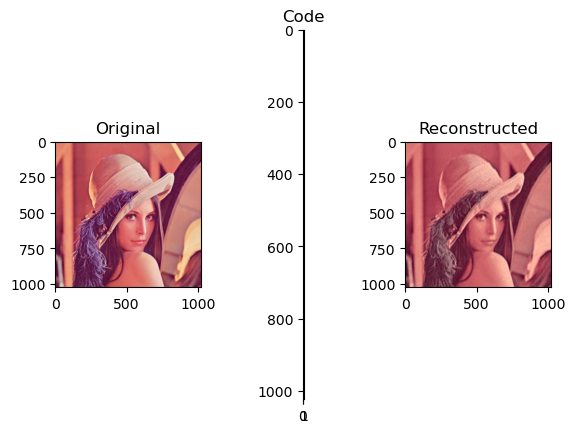

In [42]:
reconstruction_mse = autoencoder.evaluate(x_test, x_test, verbose=0)
print("Convolutional autoencoder MSE:", reconstruction_mse)
for i in range(len(x_test)):
    img = x_test[i]
    visualize(img,encoder,decoder)

In [43]:
import cv2

In [45]:
def mse(img1, img2):
   h, w = img1.shape
   diff = cv2.subtract(img1, img2)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   return mse, diff

In [46]:
error, diff = mse(img1, img2)

Image matching Error between the two images: 0.015548575669527054


In [63]:
error_list = []
psnr_list = []
difference_img = []
reco_list = []

for i in range(len(x_test)):
    img = x_test[i]
    code = encoder.predict(img[None])[0]
    reco = decoder.predict(code[None])[0]
    psnr = cv2.PSNR(img, reco)
    img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img2 = cv2.cvtColor(reco, cv2.COLOR_RGB2GRAY)
    error, diff = mse(img1, img2)
    error_list.append(error)
    difference_img.append(diff)
    psnr_list.append(psnr)
    reco_list.append(reco)

1/1 [==============================] - 0s 86ms/step


In [48]:
error_list

[0.015548575669527054,
 0.0030661800410598516,
 0.0008680122555233538,
 0.002869795775040984,
 0.0016937012551352382,
 0.0029617955442517996,
 0.012807432562112808,
 0.004158978816121817,
 0.0019273186335340142]

In [49]:
difference_img

[array([[ 0.509788  ,  0.42256662,  0.38751668, ..., -0.26319408,
         -0.14490566,  0.18074155],
        [ 0.45862615,  0.4321928 ,  0.26879263, ..., -0.39710683,
         -0.20618865,  0.10977876],
        [ 0.42899373,  0.29991677,  0.25051442, ..., -0.4037044 ,
         -0.3269552 ,  0.01021588],
        ...,
        [-0.02217765, -0.05809996, -0.09784715, ..., -0.00980729,
          0.00431666, -0.02744594],
        [ 0.04285942, -0.04643238, -0.03148539, ...,  0.01396683,
          0.01237899, -0.01441425],
        [-0.02028012, -0.05558036, -0.06960633, ...,  0.00410983,
          0.01892787, -0.02345228]], dtype=float32),
 array([[ 0.6313439 ,  0.5333637 ,  0.49154958, ...,  0.20056626,
          0.256786  ,  0.2220062 ],
        [ 0.5717816 ,  0.54242694,  0.36033514, ...,  0.02493942,
          0.16922551,  0.12868068],
        [ 0.5449279 ,  0.39998403,  0.3379693 , ..., -0.01428872,
          0.03312999,  0.00385755],
        ...,
        [ 0.01024215, -0.01395686, -0.0

In [50]:
psnr_list

[65.05239833550402,
 70.36156979417359,
 73.40429492860382,
 70.52280958852234,
 73.08307826605736,
 71.03703001310015,
 66.06733637570088,
 68.68888899418165,
 72.72579199634674]

In [69]:
for image in difference_img:
    cv2.imshow("Diffrence", image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread (0xf3e8520).
Cannot move to target thread (0x3a47740)

QObject::moveToThread: Current thread (0x3a47740) is not the object's thread

# Model Saving

In [51]:
autoencoder.save("lena_autoencoder_9filters_1117.h5")

In [44]:
#autoencoder = load_model(model_filename.format(last_finished_epoch))
# encoder = autoencoder.layers[1]
# decoder = autoencoder.layers[2]

In [48]:
#cv2.imwrite(filename, img)

(1024, 1024)